# Exploramos los datos

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

PATH = Path('/content/gdrive/My Drive/ml-practico/data')

In [3]:
list(PATH.glob('*'))
#aclImdb_v1.tar.gz este esta comprimido porque tarda mucho en descomprimirse

[PosixPath('/content/gdrive/My Drive/ml-practico/data/aclImdb_v1.tar.gz'),
 PosixPath('/content/gdrive/My Drive/ml-practico/data/movie_gross.csv'),
 PosixPath('/content/gdrive/My Drive/ml-practico/data/name.basics.tsv'),
 PosixPath('/content/gdrive/My Drive/ml-practico/data/title.akas.tsv'),
 PosixPath('/content/gdrive/My Drive/ml-practico/data/title.basics.tsv'),
 PosixPath('/content/gdrive/My Drive/ml-practico/data/title.crew.tsv'),
 PosixPath('/content/gdrive/My Drive/ml-practico/data/title.principals.tsv'),
 PosixPath('/content/gdrive/My Drive/ml-practico/data/title.ratings.tsv')]

# Arrancamos por title basics

Ver documentacion de columnas [aca](https://www.imdb.com/interfaces/)

title.basics.tsv.gz - Contains the following information for titles:

*   tconst (string) - alphanumeric unique identifier of the title
*   titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
* primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
* originalTitle (string) - original title, in the original language
* isAdult (boolean) - 0: non-adult title; 1: adult title
* startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
* endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
* runtimeMinutes – primary runtime of the title, in minutes
* genres (string array) – includes up to three genres associated with the title


In [21]:
import pandas as pd

title_basics = pd.read_csv(PATH / 'title.basics.tsv', sep='\t')
len(title_basics)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


7156880

In [8]:
title_basics.iloc[0]
title_basics.loc[title_basics["tconst"] == "tt0000002"]
# para acceder por filas 

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"


In [11]:
title_basics[title_basics.tconst=='tt0000002']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"


Nos está diciendo que tenemos columnas con tipos mezclados (por ejemplo numero y string).

Eso hace que la columa se interprete como string (se muestra como object en pandas)

In [ ]:
title_basics.dtypes  # runtimeMinutes deberia ser un float pero es un string (object), esto es asi porque algunos no tienen un numero y tienen "\N"

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

# A ver algunas rows

In [10]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
title_basics.loc[title_basics["titleType"] == "short", "startYear"].value_counts()

2017    48178
2016    47531
2018    45990
2014    45461
2015    44363
        ...  
1881        1
2115        1
1885        1
1883        1
1978        1
Name: startYear, Length: 237, dtype: int64

In [ ]:
title_basics.titleType[:7]

0    short
1    short
2    short
3    short
4    short
5    short
6    short
Name: titleType, dtype: object

## titleType

In [15]:
title_basics.titleType.value_counts()

tvEpisode       5139923
short            760240
movie            560818
video            278137
tvSeries         192100
tvMovie          123363
tvMiniSeries      33232
tvSpecial         29616
videoGame         26291
tvShort           13160
Name: titleType, dtype: int64


**Descartamos 'tvEpisode', 'tvSeries', 'tvMiniSeries', 'videoGame', 'tvShort', 'short'** (no aplican para lo que estamos trabajando ahora)

In [22]:
title_basics = title_basics[
    # Dejamos tvSpecial, video y tvMovie por ahora, vamos a ver de que se tratan
    ~title_basics.titleType.isin(['tvEpisode', 'tvSeries', 'tvMiniSeries', 'videoGame', 'tvShort', 'short'])
]

len(title_basics) # vemos con cuanta data nos quedamos

991934

In [ ]:
title_basics.titleType.value_counts() # chequeo que las haya eliminado 

movie        560818
video        278137
tvMovie      123363
tvSpecial     29616
Name: titleType, dtype: int64

In [ ]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


## runtimeMinutes

In [19]:
title_basics.runtimeMinutes # tiene\N. Los convierto

8           45.0
144         20.0
331          NaN
498        100.0
570         70.0
           ...  
7156801     66.0
7156808      NaN
7156819    116.0
7156821      NaN
7156830     49.0
Name: runtimeMinutes, Length: 991934, dtype: float64

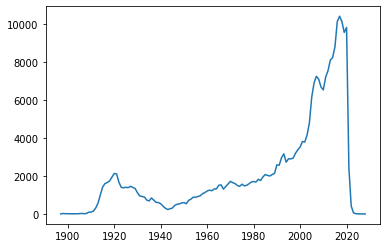

In [25]:
# veo que pelis no tienen runtimeminutes
#title_basics[title_basics.runtimeMinutes==r'\N'].head()
# veo de que anio es la peli mas nueva que no tiene runtimeminutes
#title_basics[(title_basics.runtimeMinutes==r'\N') & (title_basics.startYear!=r'\N')].startYear.apply(int).max()
#veo la distribucion de anios de las peliculas que no se cuanto duran
title_basics[(title_basics.runtimeMinutes==r'\N') & (title_basics.startYear!=r'\N')].startYear.apply(int).value_counts().sort_index().plot()

In [26]:
# Convertimos runtimeMinutes a float. No se puede tener una columna de tipo int con NaN
title_basics.runtimeMinutes = (
    title_basics.runtimeMinutes.apply(lambda x: np.nan if x == r'\N' else x).astype(float)
)

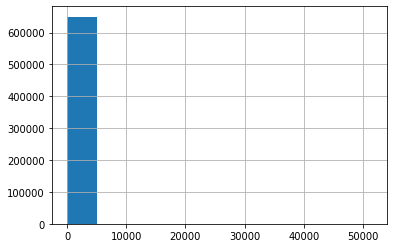

In [27]:
title_basics.runtimeMinutes.dropna().hist();
# hay algo que dura 50,000

Intentamos hacer un histograma, pero no se ve nada. Parece tener algunos valores muy grandes

In [28]:
title_basics.sort_values('runtimeMinutes', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
6380342,tt8273150,movie,Logistics,Logistics,0,2012,\N,51420.0,Documentary
2166581,tt12095652,video,The Longest Video on YouTube: 596.5 Hours,The Longest Video on YouTube: 596.5 Hours,0,2011,\N,35791.0,\N
2269937,tt12277054,movie,Carnets Filmés (Liste Complète),Carnets Filmés (Liste Complète),0,2019,\N,28643.0,Documentary
3861714,tt2659636,movie,Modern Times Forever,Modern Times Forever,0,2011,\N,14400.0,Documentary
1943883,tt11707418,tvMovie,Svalbard Minute by Minute,Svalbard minutt for minutt,0,2020,\N,13319.0,"Adventure,Documentary"


Efectivamente hay valores enormes. runtimeMinutes = 13319 quiere decir 221 horas!!!!

**esto es data preparation. Preparo los datos que le voy a dar al modelo. No le puedo dar cosas que  duran 1 mes.**

**Cuantas peliculas de mas de 3 horas hay?**

In [ ]:
(title_basics.runtimeMinutes > 3 * 60).sum() / len(title_basics)

0.009139720989501318

In [ ]:
# Un 0.9%, a ver algunas...

title_basics[title_basics.runtimeMinutes > 3 * 60].sample(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
3799339,tt2507046,video,Up That White Ass 3,Up That White Ass 3,1,2012,\N,184.0,Adult
3610855,tt2238936,video,WWE: The Best of King of the Ring Vol 3,WWE: The Best of King of the Ring Vol 3,0,2011,\N,184.0,Sport
4706405,tt4597958,video,Raw 21,Raw 21,1,2015,\N,192.0,Adult
250640,tt0261347,movie,Tenali Raman,Tenali Raman,0,1956,\N,195.0,"Comedy,Drama,History"
3985869,tt2954166,video,Evil Angels: Alexis Texas,Evil Angels: Alexis Texas,1,2013,\N,391.0,Adult
4013717,tt3021878,video,Eat My Little Asshole,Eat My Little Asshole,1,2013,\N,244.0,Adult
1254724,tt1050184,video,The Private Life of Diana Gold,The Private Life of Diana Gold,1,2007,\N,422.0,Adult
3543997,tt2162498,video,Pornstars Punishment 6,Pornstars Punishment 6,1,2012,\N,200.0,Adult
6874669,tt9322608,video,Latinas Like It Big 2,Latinas Like It Big 2,1,2016,\N,203.0,Adult
64761,tt0066059,movie,Die Hochzeit des Figaro,Die Hochzeit des Figaro,0,1967,\N,189.0,"Comedy,Musical"


**Parece haber muchos video**

In [ ]:
title_basics[title_basics.runtimeMinutes > 3 * 60].titleType.value_counts()

video        5122
movie        1999
tvMovie      1151
tvSpecial     794
Name: titleType, dtype: int64

**Pareciera que hay muchos videos, tvMovie y tvSpecial. En el original habia muchos menos videos y tvMovies que movies. Mmm extranio**

Por otro lado, alguna de estas estará en la base de datos de grossing? Ya que estamos, tambien podemos juntarla con la de ratings

### Merges para ver una foto mas completa

El archivo movie_gross tiene la recaudacion de la pelicula. Un problema seria predecir la ganancia de una pelicula. Eso seria un problema de regresion lineal.

In [29]:
movie_gross = pd.read_csv(PATH / 'movie_gross.csv') # tiene cuanto gano la pelicula 

In [30]:
movie_gross.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
movie_gross.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [31]:
# No tenemos el id, pero tenemos el link
movie_gross.movie_imdb_link.head()

0    http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1    http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2    http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3    http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4    http://www.imdb.com/title/tt5289954/?ref_=fn_t...
Name: movie_imdb_link, dtype: object

In [32]:
movie_gross['tconst'] = movie_gross.movie_imdb_link.apply(lambda x: x.split('/')[4])

In [33]:
# A priori solo nos interesa el tconst y el gross

movie_gross = movie_gross[['tconst', 'gross']] # el gross es la ganancia (mepa)

In [48]:
movie_gross.head()

,tconst,gross
0,tt0006864,NaN
1,tt0011549,3000000.0
2,tt0015624,NaN
3,tt0017136,26435.0
4,tt0018737,9950.0


In [34]:
# aca hago join entre movie_gross y title_basics con tconst , si una peli que esta en movie_gross, no esta en title_basics, la tira , no la inlcuye
# si no puede matchear algun registro, lo tira
# si tengo en una tabla un registro repetido 3 veces y en la segunda tabla repetido 5 veces, va a meter 15 registros (hace todos con todos) 
movies = title_basics.merge(movie_gross, on='tconst')

In [35]:
# Checkeamos no perder datos
len(movies), len(movie_gross), len(title_basics)
# el len de movie_gross es muy chico, no es comprehensive 

(4926, 5043, 991934)

Me quede con algo un poco mas chico que movie_gross 

levanto el movie gross y comparo la distribucion de raitings para las pelis para las que tengo gross con la distribucion de las que no tienen gross. Si las distribuciones dan muy diferentes es que me mete un sesgo quedarme solamente con las pelis  que tienen gross. 

In [36]:
# Perdemos un monton!!!!
# asi no descarta nada . no descarta lo de title basics que no tenga gross
movies = title_basics.merge(movie_gross, on='tconst', how='left')

In [ ]:
len(movies), len(movie_gross), len(title_basics)

(992056, 5043, 991934)

In [ ]:
5043+991934

996977

In [ ]:
# Pareciera haber repetidos en movie_gross....

repeated = movie_gross.tconst.value_counts().sort_values(ascending=False).head(10)
repeated

tt3332064    3
tt1976009    3
tt2224026    3
tt2638144    3
tt0360717    3
tt0077651    3
tt0232500    3
tt0417148    2
tt0324554    2
tt0097441    2
Name: tconst, dtype: int64

In [ ]:
movie_gross[movie_gross.tconst.isin(repeated.index.tolist())].sort_values('tconst').head(20)

,tconst,gross
4821,tt0077651,47000000.0
2619,tt0077651,47000000.0
2492,tt0077651,47000000.0
2418,tt0097441,26830000.0
1713,tt0097441,26830000.0
100,tt0232500,144512310.0
395,tt0232500,144512310.0
1332,tt0232500,144512310.0
2169,tt0324554,12831121.0
1697,tt0324554,12831121.0


In [ ]:
# Pareciera que los repetidos son repetidos de verdad. Vamos a hacer un ultimo check

# Vemos la cantidad de valores distintos para "gross", para ver si hay valores diferentes
movie_gross.groupby('tconst').agg({'gross':'nunique'}).max()

gross    1
dtype: int64

In [37]:
# Vamos de deduplicar gross

movie_gross = movie_gross.groupby('tconst').gross.max().reset_index()

In [ ]:
# chequeo que no haya repetidos
repeated = movie_gross.tconst.value_counts().sort_values(ascending=False).head(10)
repeated

tt0465142    1
tt0086541    1
tt0253556    1
tt0434409    1
tt0286716    1
tt0765476    1
tt1700841    1
tt0119326    1
tt0433383    1
tt0844286    1
Name: tconst, dtype: int64

In [49]:
movies = title_basics.merge(movie_gross, on='tconst', how='left')

len(movies), len(title_basics), len(movie_gross)

(991934, 991934, 4919)

### Merge con ratings

**Si tiene muchas estrellitas vamos a decir que la pelicula tiene exito. Queremos predecir cuantas estrellitas va a tener la pelicula.** 

In [38]:
title_ratings = pd.read_csv(PATH / 'title.ratings.tsv', sep='\t')

In [13]:
len(title_ratings)
# a ojo ya hay distinto que en title_basics
# hay peliculas que no tienen raitings y hay pelis con raitings que no tienen title_basics

1071882

In [14]:
title_ratings[title_ratings.tconst=='tt0120338']

,tconst,averageRating,numVotes
88930,tt0120338,7.8,1024063


In [ ]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1646
1,tt0000002,6.1,198
2,tt0000003,6.5,1344
3,tt0000004,6.2,120
4,tt0000005,6.2,2131


In [50]:
# mergeo el dataframe movies (title_basics + gross) con title_ratings
movies_wr = movies.merge(title_ratings, on='tconst')
movies_wr.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,gross,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45.0,Romance,NaN,5.9,154
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20.0,"Documentary,News,Sport",NaN,5.2,356
2,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,NaN,"Biography,Drama",NaN,6.1,41
3,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100.0,\N,NaN,3.8,6
4,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70.0,"Biography,Crime,Drama",NaN,6.1,589


In [ ]:
# Checkeamos que no perdimos data en el join
len(movies_wr), len(movies), len(title_ratings)

(364335, 991934, 1071882)

In [51]:
# Perdimos un monton de datos!!!!!!
# Ademas podemos ver que hay peliculas que tienen rating pero que no figuran en title_basics
# por ahora no hacemos nada con eso...

movies_wr = movies.merge(title_ratings, on='tconst', how='left')
# me quedo solo con las peliculas de title_ratings que figuran en title_basics  

In [ ]:
len(movies_wr), len(movies), len(title_ratings)

(991934, 991934, 1071882)

In [53]:
movies = movies_wr

In [57]:
movies[~movies.gross.isna()].averageRating

5397      4.2
10045     8.3
11391     7.9
12223     5.7
15508     7.4
         ... 
755897    4.4
758127    4.9
761215    6.2
764412    7.2
776393    7.4
Name: averageRating, Length: 4051, dtype: float64

In [63]:
#len(movies)

#movies.loc[movies["averageRating"] == "Nan"].value_counts()
len(movies[movies.averageRating.isna()])


627599

In [64]:
len(movies)

991934

In [65]:
991934-627599

364335

In [66]:
movies=movies[~movies.averageRating.isna()]
len(movies)
# le tuve que sacar los que tenian nan en average rating, sino no me hacia el boxplot, abajo tmb lo solucione sin sacarlos

364335

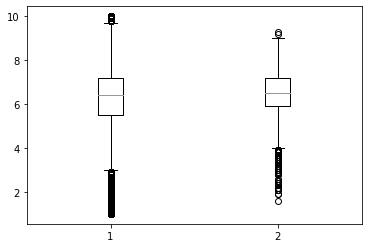

In [67]:
plt.boxplot([movies[(movies.gross.isna()) & (~movies.averageRating.isna())].averageRating, movies[~movies.gross.isna()].averageRating]);


A priori las medianas son parecidas. El boxplot de la izquierda es la distribucion de averageraiting cuando no tengo informacion de gross. El de la derecha es cuando tengo informacion de gross. Cuando no tengo info de gross hay un monton de peliculas que tienen baja raiting (los que estan en el boxplot 1 abajo). 

## Volviendo a donde estabamos...
![image.png](attachment:image.png)

In [ ]:
movies[movies.runtimeMinutes > 3 * 60].sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,gross,averageRating,numVotes
868725,tt7054670,video,The Hottest Girls in Porn,The Hottest Girls in Porn,1,2017,\N,340.0,Adult,NaN,5.4,5.0
797036,tt5625830,video,A Gonzo Story: Whorehouse Virgin,A Gonzo Story: Whorehouse Virgin,1,2016,\N,184.0,Adult,NaN,NaN,NaN
503950,tt1377817,movie,Welcome to New York,Welcome to New York,0,2005,\N,950.0,Comedy,NaN,NaN,NaN
777591,tt5236714,tvMovie,"Alcina, Georg Friedrich Haendel","Alcina, Georg Friedrich Haendel",0,2015,\N,193.0,"Drama,Horror,Musical",NaN,8.1,10.0
469253,tt12573178,video,Reumatikerförbundet fyller 70 år!,Reumatikerförbundet fyller 70 år!,0,2015,\N,266.0,"Documentary,Talk-Show",NaN,NaN,NaN
565702,tt1808299,tvSpecial,Melbourne Cup Day,Melbourne Cup Day,0,1988,\N,520.0,Sport,NaN,NaN,NaN
520331,tt1495681,video,Baby Got Boobs,Baby Got Boobs,1,2009,\N,208.0,Adult,NaN,6.5,6.0
811133,tt5903740,video,Superiority Complex,Superiority Complex,1,2016,\N,196.0,Adult,NaN,NaN,NaN
616874,tt2278998,video,Endogonidic Tragedy,Tragedia Endogonidia,0,2007,\N,341.0,Documentary,NaN,NaN,NaN
326294,tt0924443,video,Funbag Fantasies 5,Funbag Fantasies 5,1,2006,\N,240.0,Adult,NaN,NaN,NaN


**Parece haber mucho de adultos**

In [ ]:
n_long_adult = movies[movies.runtimeMinutes > 3 * 60].genres.apply(lambda x: 'Adult' in x).sum()
n_long = (movies.runtimeMinutes > 3 * 60).sum()

n_long, n_long_adult, n_long_adult / n_long

(9066, 4064, 0.4482682550187514)

**Parece que no tienen data de gross**

In [ ]:
movies[movies.runtimeMinutes > 3 * 60].gross.isna().sum() / n_long

0.9962497242444297

In [ ]:
# idem para 2 horas
movies[movies.runtimeMinutes > 2 * 60].gross.isna().sum() / (movies.runtimeMinutes > 2 * 60).sum()

0.9847324372305352

In [ ]:
movies = movies[movies.runtimeMinutes <= 2 * 60].copy()
#me quedo solo con las peliculas que duran 2 horas o menos 

In [ ]:
(movies.runtimeMinutes > 2* 60).sum()  # hay cero peliculas que duren mas de 2 horas

0

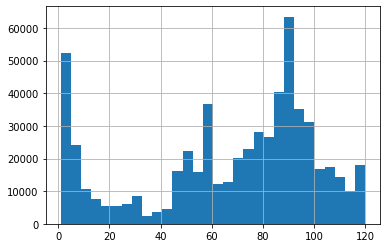

In [ ]:
movies.runtimeMinutes.hist(bins=30);

Sigue habiendo duraciones muy cortas!!! 

Veamos a ver si alguna otra columna nos da una pista

## Genres

In [ ]:
from itertools import chain
from collections import Counter
# cada pelicula tiene mas de un genero por ejemplo en genero puede tener [Documentary, News, Sport]
def parse_genres(genres):
    if isinstance(genres, float) or genres == r'\N': return ['no-genre']
    else: return genres.split(',')
    

movies['genres'] = movies.genres.apply(parse_genres)

In [ ]:
Counter(chain(*movies.genres.tolist()))

Counter({'Action': 32379,
         'Adult': 44273,
         'Adventure': 23924,
         'Animation': 13507,
         'Biography': 17905,
         'Comedy': 101248,
         'Crime': 28723,
         'Documentary': 137983,
         'Drama': 157279,
         'Family': 20096,
         'Fantasy': 12931,
         'Film-Noir': 762,
         'Game-Show': 364,
         'History': 14041,
         'Horror': 25005,
         'Music': 70732,
         'Musical': 8844,
         'Mystery': 13509,
         'News': 5521,
         'Reality-TV': 1480,
         'Romance': 34458,
         'Sci-Fi': 9936,
         'Short': 98804,
         'Sport': 8305,
         'Talk-Show': 1736,
         'Thriller': 25848,
         'War': 7212,
         'Western': 5266,
         'no-genre': 29089})

In [ ]:
#movies.genres.value_counts()
movies.genres[:10]

0                      [Romance]
1     [Documentary, News, Sport]
3                     [no-genre]
4      [Biography, Crime, Drama]
9           [Adventure, Fantasy]
57            [Adventure, Drama]
63                       [Drama]
65    [Biography, Drama, Family]
83                       [Drama]
85                         [War]
Name: genres, dtype: object

**Hay varios Short, no debería!**

A ver cual es la duracion...

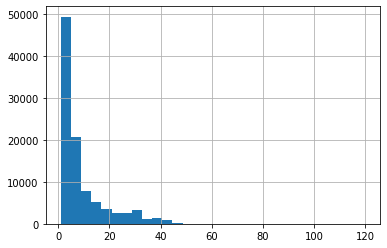

In [ ]:
movies[movies.genres.apply(lambda x: 'Short' in x)].runtimeMinutes.hist(bins=30);

🚀

In [ ]:
movies = movies[movies.genres.apply(lambda x: 'Short' not in x)]

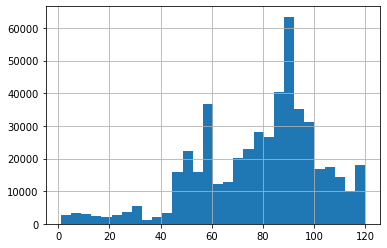

In [ ]:
movies.runtimeMinutes.hist(bins=30);

In [ ]:
movies[movies.runtimeMinutes < 60].titleType.value_counts()

movie        46335
tvMovie      30296
video        18805
tvSpecial     3207
Name: titleType, dtype: int64

Chau video, tvSpecial y tvMovie

In [ ]:
movies = movies[~movies.titleType.isin(['video', 'tvSpecial', 'tvMovie'])]

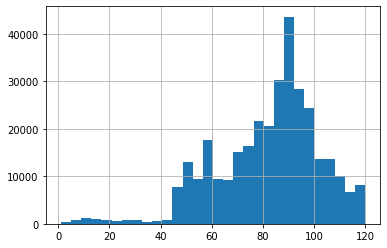

In [ ]:
movies.runtimeMinutes.hist(bins=30);

## [Cuanto dura un largometraje??](https://www.google.com/search?q=cuanto+dura+un+largometraje&oq=cuanto+dura+un+largometraje&aqs=chrome..69i57.3779j0j7&sourceid=chrome&ie=UTF-8)

In [ ]:
movies = movies[movies.runtimeMinutes >= 60]

Se te ocurre algun otro check para hacer??